# MARKET BASKET ANALYSIS

Brieft on the Dataset : Mr.Menon is the owner of departmental stores he is been working with a analytics team on improving his buisness . The analytics team took the dataset of the past 2 months . The dataset consists of last items pucrhased aross 8000+ bills in the last 2 months

Buisness Problem being worked on : The analytics team has been keenly working on identifying patterns from the data .On what set of items combination can be placed adjacent to each other

Approach :  <br>
Importing essntial libararies <br>
Importing the excel file <br>
Creating a dummy dataframe to binary encode each item in the dataset <br>
The Items are then being sorted according to frequency of the items  <br>
The sorting is being done to identify the support of Items <br>
We can get an idea on what could be the possible threshold support value  <br>
We apply appriori algorithm with a threshold of a support value and extract the item sets <br>
Association rules can be applied on the identified itemset with a threshold lift value and possible combinations could be extratced <br>
The analytics team hands over the detailed working to Mr.Menon and his team and feasible arrangement inside the store can be done <br>




## Importing Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import pyfpgrowth as fptree

In [2]:
df_hotelbill=pd.read_excel("Grocery Stores.xlsx")

In [3]:
df_hotelbill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   9835 non-null   object
 1   Unnamed: 1   7676 non-null   object
 2   Unnamed: 2   6033 non-null   object
 3   Unnamed: 3   4734 non-null   object
 4   Unnamed: 4   3729 non-null   object
 5   Unnamed: 5   2874 non-null   object
 6   Unnamed: 6   2229 non-null   object
 7   Unnamed: 7   1684 non-null   object
 8   Unnamed: 8   1246 non-null   object
 9   Unnamed: 9   896 non-null    object
 10  Unnamed: 10  650 non-null    object
 11  Unnamed: 11  468 non-null    object
 12  Unnamed: 12  351 non-null    object
 13  Unnamed: 13  273 non-null    object
 14  Unnamed: 14  196 non-null    object
 15  Unnamed: 15  141 non-null    object
 16  Unnamed: 16  95 non-null     object
 17  Unnamed: 17  66 non-null     object
 18  Unnamed: 18  52 non-null     object
 19  Unnamed: 19  38 non-null   

## Data Manipulation

Setting Column names for the DataFrame 

In [4]:
colnames= ['Item'+str(i) for i in range(1,33)]    
df_hotelbill.columns=colnames

Obtaining the list of Unique items in the dataset 

In [5]:
item_set=set()
for i in range(df_hotelbill.shape[1]):
    for j in range(df_hotelbill.shape[0]):
        item_set.add(df_hotelbill.iloc[j,i])
    

In [6]:
list(item_set)[:10]

[nan,
 'roll products ',
 'fruit/vegetable juice',
 'soda',
 'ice cream',
 'popcorn',
 'detergent',
 'salt',
 'oil',
 'brown bread']

In [7]:
df_hotelbill.head(5)

,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Item9,Item10,...,Item23,Item24,Item25,Item26,Item27,Item28,Item29,Item30,Item31,Item32
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Creating Dummy Dataframe with rows as number of bills and columns as unique items

In [8]:
dummy=np.zeros((df_hotelbill.shape[0],len(item_set)))

In [9]:
df_groecerydummy=pd.DataFrame(dummy)

In [10]:
df_groecerydummy.shape

(9835, 170)

Setting the unique items as column name

In [11]:
df_groecerydummy.columns=item_set

In [12]:
df_groecerydummy.head(5)

,NaN,roll products,fruit/vegetable juice,soda,ice cream,popcorn,detergent,salt,oil,brown bread,...,salty snack,salad dressing,specialty fat,potato products,turkey,dessert,soups,soft cheese,sweet spreads,bags
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Dropping Nan Column

In [13]:
df_groecerydummy.drop(np.nan,axis=1,inplace=True)

Setting the Value as 1 in which ever bill item was present 

In [14]:
for i in range(df_hotelbill.shape[0]):
    for j in range(df_hotelbill.shape[1]):
        if(pd.isna(df_hotelbill.iloc[i,j])==False):
            df_groecerydummy.loc[i,df_hotelbill.iloc[i,j]]=1

In [15]:
df_groecerydummy.head(5)

,roll products,fruit/vegetable juice,soda,ice cream,popcorn,detergent,salt,oil,brown bread,syrup,...,salty snack,salad dressing,specialty fat,potato products,turkey,dessert,soups,soft cheese,sweet spreads,bags
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Exploratory Data Analysis

In [16]:
total_items_sold= sum(df_groecerydummy.sum())

In [17]:
print("Total Count of Unique Items billed in each bill",total_items_sold)

Total Count of Unique Items billed in each bill 43367.0


Arranging the Items along with its frequency in descending order 

In [18]:
item_frequency=pd.DataFrame(df_groecerydummy.sum().sort_values(ascending=False)).reset_index()

In [19]:
print("Top 5 Items by frequeny")
item_frequency.head(5)

Top 5 Items by frequeny


,index,0
0,whole milk,2513.0
1,other vegetables,1903.0
2,rolls/buns,1809.0
3,soda,1715.0
4,yogurt,1372.0


Renaming the column as Item_Name and Frequency

In [20]:
item_frequency.rename(columns={item_frequency.columns[0]:'Item_Name',item_frequency.columns[1]:'Frequency'},inplace=True)

In [21]:
item_frequency.head(5)

,Item_Name,Frequency
0,whole milk,2513.0
1,other vegetables,1903.0
2,rolls/buns,1809.0
3,soda,1715.0
4,yogurt,1372.0


In [22]:
##Top 30 Sold Items

In [23]:
top_30_items=list(item_frequency.Item_Name.head(30))

In [24]:
top_30_items[:5]

['whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt']

Plot of Top 30 Items Frequency Distribution

Text(0.5, 1.0, 'Top 30 Items Frequency Distribution')

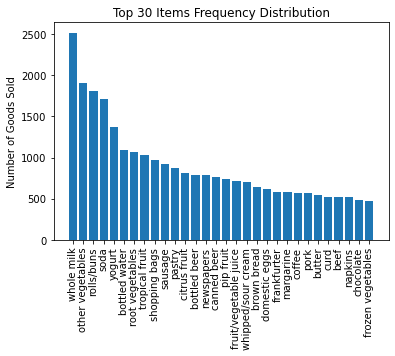

In [25]:
item_len= np.arange(len(top_30_items))
top_30_frequency = list(item_frequency['Frequency'].head(n=30))
plt.bar(item_len, top_30_frequency)
plt.xticks(item_len,top_30_items, rotation='vertical')
plt.ylabel('Number of Goods Sold')
plt.title('Top 30 Items Frequency Distribution')

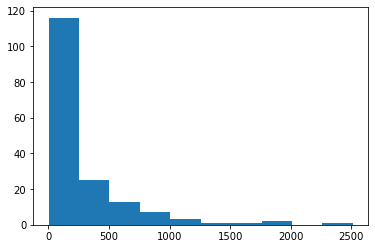

In [26]:
plt.hist(item_frequency['Frequency'])
plt.show()

As per the above Histogram Projection there are many items which has frequency less than 250. So the minimum supoort criteria should be as minimum as possible 

In [27]:
item_frequency.iloc[0,:].Frequency

2513.0

In [28]:
item_with_max_support=(item_frequency.iloc[0,:].Frequency)/df_groecerydummy.shape[0]
item_with_max_support

0.25551601423487547

In [29]:
item_with_min_support=(item_frequency.iloc[168,:].Frequency)/df_groecerydummy.shape[0]
item_with_min_support

0.00010167768174885612

Key Facts about the Dataset <br>
Maximum Support of an Item Sold : 0.255 <br>
Minimum Support of an Item Sold : 0.0001 <br>
Number of Unique Items : 169 <br>
Number of Bills : 9835

## Model Building

In [30]:
most_combined_items = apriori(df_groecerydummy,min_support=0.02,use_colnames=True)
rules = association_rules(most_combined_items, metric="lift", min_threshold=1.5)

In [31]:
most_combined_items

,support,itemsets
0,0.072293,(fruit/vegetable juice)
1,0.174377,(soda)
2,0.025013,(ice cream)
3,0.028063,(oil)
4,0.064870,(brown bread)
...,...,...
117,0.029283,"(tropical fruit, yogurt)"
118,0.021657,"(yogurt, citrus fruit)"
119,0.020742,"(yogurt, whipped/sour cream)"
120,0.023183,"(other vegetables, root vegetables, whole milk)"


In [32]:
rules[['antecedents','consequents']]

,antecedents,consequents
0,(other vegetables),(fruit/vegetable juice)
1,(fruit/vegetable juice),(other vegetables)
2,(soda),(bottled water)
3,(bottled water),(soda)
4,(whole milk),(brown bread)
...,...,...
71,"(yogurt, whole milk)",(other vegetables)
72,"(other vegetables, whole milk)",(yogurt)
73,(yogurt),"(other vegetables, whole milk)"
74,(other vegetables),"(yogurt, whole milk)"


In [33]:
rules.to_excel("FinalItemSet.xlsx")

## Conclusion

Conclusion : From the above case study on Mr.Menon's Departmental Store. We did a market basket analysis on bill wise data . When we applied apriori algorithm to the grocery dataset we would get subsets of items which follow the given condition (Support >0.02) . Association rule is applied on the set of items extracted from apriori. The possible combination which has lift greater than 1.5. Is being considered as the good combonation. We can also change thresholds and extract outputs

Most Suggested Items sets are <br>
1)  Dairy Products and Vegetables <br>
2)  Meat and Dairy Products <br>
3)  Fruits and Dairy Products